In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
plt.rcParams.update({
    'font.size': 12,               # 字體大小
    'axes.labelsize': 14,          # 軸標籤字體大小
    'xtick.labelsize': 12,         # x 軸刻度字體大小
    'ytick.labelsize': 14,         # y 軸刻度字體大小
    'legend.fontsize': 12,         # 圖例字體大小
    'figure.figsize': [7., 5],     # 圖片大小 
    'lines.linewidth': 2,          # 線條寬度
    'axes.linewidth': 1.5          # 坐標軸寬度
})

grid_alpha = 0.6
rotation = -60

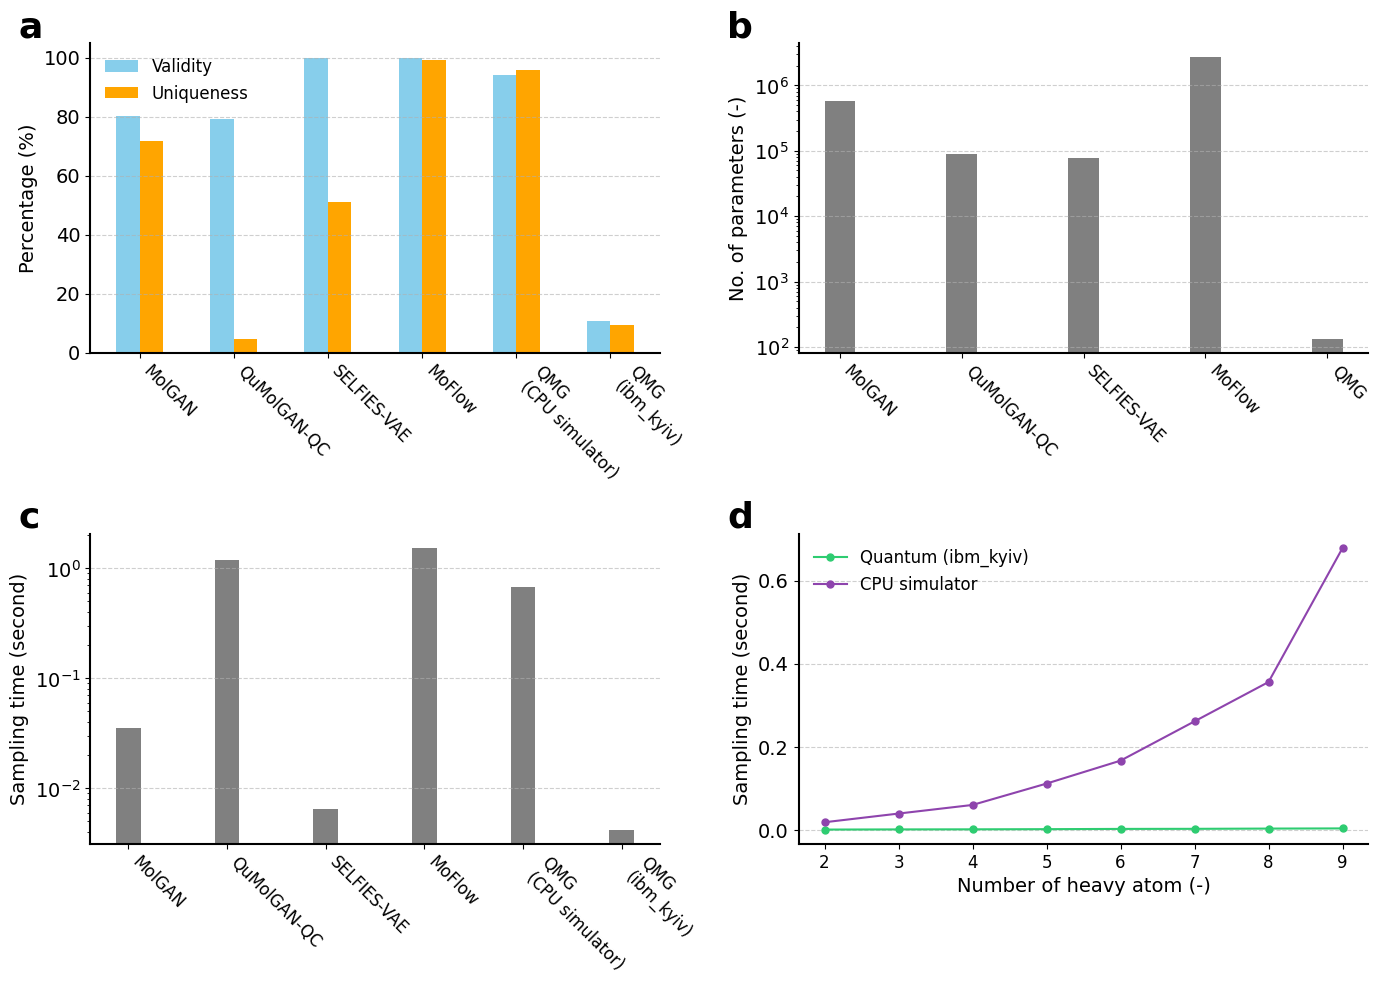

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Plot settings
plt.rcParams.update({
    'font.size': 12,               # 字體大小
    'axes.labelsize': 14,          # 軸標籤字體大小
    'xtick.labelsize': 12,         # x 軸刻度字體大小
    'ytick.labelsize': 14,         # y 軸刻度字體大小
    'legend.fontsize': 12,         # 圖例字體大小
    'figure.figsize': [12, 10],    # 合併圖大小
    'lines.linewidth': 2,          # 線條寬度
    'axes.linewidth': 1.5          # 坐標軸寬度
})

grid_alpha = 0.6
rotation = -45
width = 0.25  # 柱狀圖寬度

# Data
models = ["MolGAN", "QuMolGAN-QC", "SELFIES-VAE", "MoFlow", "QMG\n(CPU simulator)", "QMG\n(ibm_kyiv)"]
models_parameter = ["MolGAN", "QuMolGAN-QC", "SELFIES-VAE", "MoFlow", "QMG"]
validity = [80.40, 79.39, 100, 100, 94.2, 10.8]
uniqueness = [71.89, 4.49, 51.08, 99.26, 95.7, 9.4]
parameters = [576000, 90000, 77000, 2712000, 134]
# log_parameters = [np.log10(p) for p in parameters]
sampling_time = [0.035, 1.2, 0.0065, 1.53, 0.678194, 21/5000] # per sample, 92/50000

x1 = np.arange(len(models))
x2 = np.arange(len(models_parameter))
x3 = np.arange(len(models))

# Data for the last plot
x = np.array([2, 3, 4, 5, 6, 7, 8, 9])
simulator = np.array([0.019, 0.0399, 0.0606, 0.111986, 0.167123, 0.261617, 0.356136, 0.678194]) 
quantum = np.array([7, 9, 10, 12, 15, 16, 19, 21]) / 5000

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Validity and Uniqueness
ax1 = axes[0, 0]
ax1.bar(x1 - width/2, validity, width, color='skyblue', label='Validity')
ax1.bar(x1 + width/2, uniqueness, width, color='orange', label='Uniqueness')
ax1.set_ylabel('Percentage (%)')
ax1.set_xticks(x1)
ax1.set_xticklabels(models, rotation=rotation, ha='left')
ax1.legend(frameon=False, loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=grid_alpha)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(-0.125, 1.02, 'a', transform=ax1.transAxes, fontsize=26, fontweight='bold')

# Plot 2: Parameter Counts (Logarithmic Scale)
ax2 = axes[0, 1]
ax2.bar(x2, parameters, width, color='gray', label='No. of parameters (log10)')
ax2.set_ylabel('No. of parameters (-)')
ax2.set_xticks(x2)
ax2.set_xticklabels(models_parameter, rotation=rotation, ha='left')
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(ticker.LogLocator(base=10.0))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"$10^{{{int(np.log10(y))}}}$"))

ax2.grid(axis='y', linestyle='--', alpha=grid_alpha)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.text(-0.125, 1.02, 'b', transform=ax2.transAxes, fontsize=26, fontweight='bold')

# Plot 3: Sampling time (computational efficiency)
ax3 = axes[1, 0]
ax3.bar(x3, sampling_time, width, color='gray', label='Sampling time (second)')
ax3.set_ylabel('Sampling time (second)')
ax3.set_xticks(x3)
ax3.set_xticklabels(models, rotation=rotation, ha='left')
ax3.grid(axis='y', linestyle='--', alpha=grid_alpha)
ax3.set_yscale('log')  # or ax.set_yscale('log', base=10)
# yticks = [10**1, 10**2, 10**3, 10**4]
# ax3.set_yticks(yticks)
# ax3.set_yticklabels([r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.text(-0.125, 1.02, 'c', transform=ax3.transAxes, fontsize=26, fontweight='bold')

# Plot 4: Quantum vs. CPU simulator sampling time
ax4 = axes[1, 1]
ax4.plot(x, quantum, color="#2ECC71", marker='o', markersize=5, linewidth=1.5, label='Quantum (ibm_kyiv)')
ax4.plot(x, simulator, color='#8e44ad', marker='o', markersize=5, linewidth=1.5, label='CPU simulator')
ax4.set_xticks(x)
ax4.set_xlabel("Number of heavy atom (-)")
ax4.set_ylabel("Sampling time (second)")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.legend(fontsize=12, frameon=False, loc='best')
ax4.grid(axis='y', linestyle='--', alpha=grid_alpha)
ax4.text(-0.125, 1.02, 'd', transform=ax4.transAxes, fontsize=26, fontweight='bold')

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("figures/model_comparison.svg", format="svg")
plt.show()
